<a href="https://colab.research.google.com/github/molinamarcvdb/ImageProcessing/blob/main/Copy_of_PIB_operacions_basiques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Operacions bàsiques amb imatges

## 1. Llegir i visualitzar una imatge:

### Carregant la imatge desde una unitat local:


Primer pujem la imatge a la plataforma google colab:

In [ ]:
from google.colab import files # load skimage libraries
import io
uploaded = files.upload()

Saving car.data to car.data


In [1]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

I ara llegim la imatge per obtenir una matriu amb els valors d'intensitat de píxel en cada canal: 

In [ ]:
import skimage as sk # load skimage libraries
from skimage import io
I = sk.io.imread('mammograph.tif') # read image using imread function

Per consultar el tamany de la imatge en píxels i el nombre de canals fem:

In [ ]:
I.shape

(1164, 984)

Podem consultar quants bits es fan servir per codificar els nivells d'intensitat de cada píxel:

In [ ]:
I.dtype

dtype('uint8')

In [ ]:
import numpy as np
np.mean(I);


In [ ]:
np.min(I);


In [ ]:
np.max(I)

255

Ara ja podem visualitzar la imatge:

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
sk.io.imshow(I) # visualize image using imshow function
sk.io.show()

NameError: ignored

<Figure size 720x432 with 0 Axes>

### Llegint una imatge desde el nostre google drive:

Primer muntem la nostra unitat de google drive per poder-hi accedir desde google colab:

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path ='/content/drive/MyDrive/PIB/pneumo.jpg'
I1 = sk.io.imread(file_path) # read image using imread function
I1.shape

(867, 1024, 3)

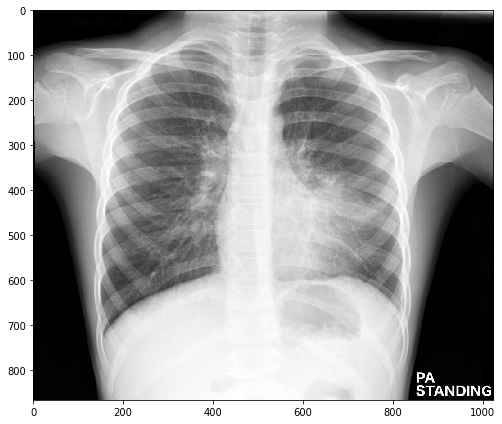

In [ ]:
fig = plt.figure(figsize=(10,6))
sk.io.imshow(I1) # visualize image using imshow function
sk.io.show()

Si volem visualitzar totes dues imatges a la vegada:

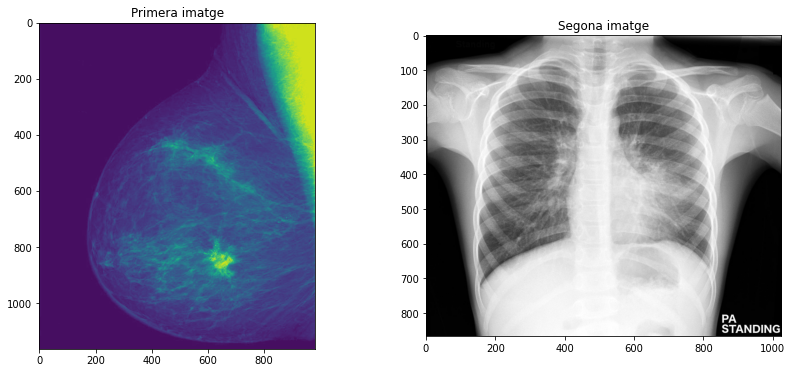

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure(figsize=(14, 6))
plt.subplot(121) 
plt.imshow(I) # visualize image using imshow function
plt.title('Primera imatge') 

plt.subplot(122)
plt.imshow(I1) # visualize image using imshow function
plt.title('Segona imatge') 
plt.show()



Podem salvar la figura en un fitxer .png fent

In [ ]:
plt.savefig('dues_imatges.png')


<Figure size 432x288 with 0 Axes>

## 2. Adreçament a valors de píxels

In [ ]:
I[0,0] # Pixel value of first row, first column

38

In [ ]:
I[0,983] # Pixel value of first row, last column

238

Representar gràficament els píxels al llarg d'una determinada fila:

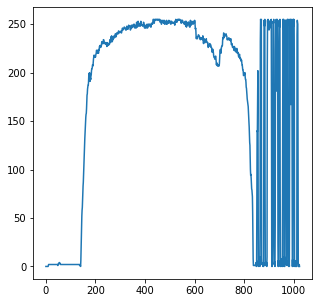

In [ ]:
Irow = I1[850,:,0] # pixels along the row 850 

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,5))
plt.plot(Irow)
plt.show()

## Operacions amb imatges en color:

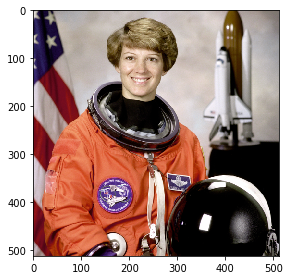

M = 512 columns, N = 512 rows, NC = 3 color channels


In [ ]:
import skimage as sk # load skimage libraries
IC = sk.data.astronaut() # load a color image from the skimage built-in dataset
# change colormap to visualize image
sk.io.imshow(IC) # visualize image using imshow function
sk.io.show() 
print('M = {} columns, N = {} rows, NC = {} color channels'.format(*IC.shape)) # Print out image size

Convertim la imatge RGB a una imatge en escala de grisos fent servir la fòrmula \
$IG = \frac{0.2125 \cdot R + 0.7154\cdot G + 0.0721\cdot B}{255}$


In [ ]:
IG = sk.color.rgb2gray(IC)
IG.shape

(512, 512)

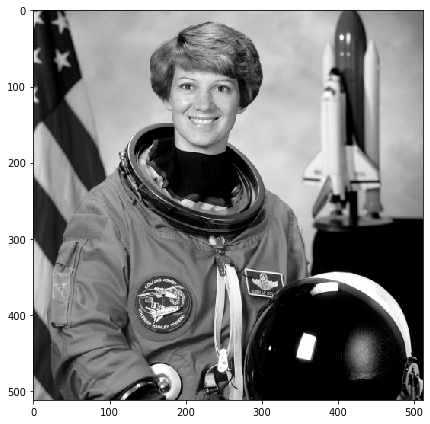

In [ ]:
fig = plt.figure(figsize=(10,6))
sk.io.imshow(IG) # visualize image using imshow function
sk.io.show()

Comprovar que la fòrmula és correcta accedint a un píxel en particular:

In [ ]:
IG[0,0]

0.5834349019607843

In [ ]:
(0.2125*IC[0,0,0] + 0.7154*IC[0,0,1] + 0.0721*IC[0,0,2])/255

0.5834349019607843

## Fer servir mapes de color (colormaps):

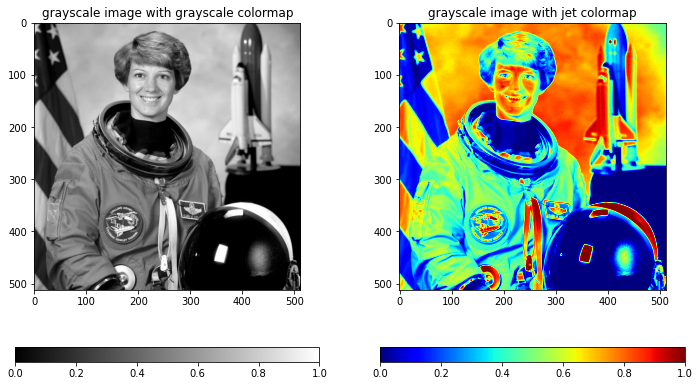

In [ ]:
import matplotlib.pyplot as plt 
fig,axes = plt.subplots(1,2,figsize=(12,7))
ax = axes.ravel() # convert axes to a 1d array
im1 = ax[0].imshow(IG,cmap=plt.cm.gray) # visualize image using imshow function using a grayscale colormap
ax[0].set_title('grayscale image with grayscale colormap') # set figure title
fig.colorbar(im1,ax=ax[0],orientation='horizontal') # visualize colorbar 
im2 = ax[1].imshow(IG,cmap=plt.cm.jet) # visualize image using imshow function using a grayscale colormap
ax[1].set_title('grayscale image with jet colormap') # set figure title
fig.colorbar(im2,ax=ax[1],orientation='horizontal') # visualize colorbar 
sk.io.show() 

# 3. Histograma d'una imatge:

L'histograma d'una imatge en escala de grisos representa la distribució de valors de intensitat de píxel i per tant la probabilitat d'un cert valor d'intensitat (nombre de píxels amb aquell valor / nombre de píxels totals)

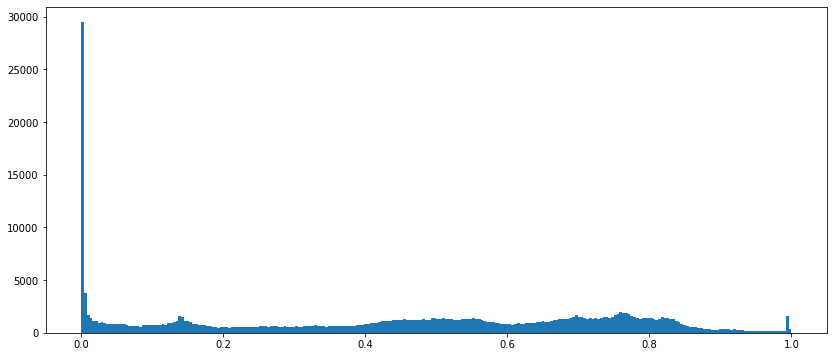

In [ ]:
# reshape the uint8 image as 1d array:
v = IG.reshape(IG.shape[0]*IG.shape[1],1)

fig = plt.figure(figsize=(14, 6))
plt.hist(v, bins=256,density=False)
plt.show()

En cas que hi hagi massa píxels amb el valor zero podem representar l'histograma sense tenir en compte aquest nivell:

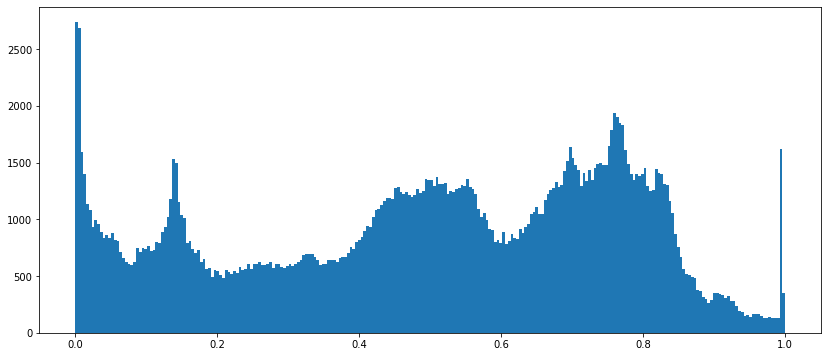

In [ ]:
# keep only pixels with a value higher than zero: 
v = v[v>0]
fig = plt.figure(figsize=(14, 6))
plt.hist(v, bins=256,density=False)
plt.show()